<a href="https://colab.research.google.com/github/Cheeku1998/DNN-Models/blob/main/RNN_of_wind_data_all_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit as SSS , train_test_split
color=sns.color_palette()
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wind_data=pd.read_csv("/content/drive/MyDrive/Psm 2nd sem/MLDA/Data.csv")
wind_data=wind_data.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'],axis=1)
wind_data=wind_data.dropna()
time_axis=pd.to_datetime(wind_data.date,format="%Y%m%d%H")
wind_data.head()
wind_data

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2.009070e+09,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2.009070e+09,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2.009070e+09,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2.009070e+09,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2.009070e+09,0.045,0.032,0.079,0.039,0.010,0.000,0.000
...,...,...,...,...,...,...,...,...
18752,2.012063e+09,0.170,0.138,0.119,0.149,0.339,0.132,0.101
18753,2.012063e+09,0.211,0.106,0.208,0.193,0.359,0.132,0.076
18754,2.012063e+09,0.251,0.090,0.247,0.132,0.329,0.132,0.076
18755,2.012063e+09,0.301,0.058,0.356,0.061,0.293,0.105,0.076


In [ ]:
wind_data.shape

(18757, 8)

In [ ]:
wind_data.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2.009070e+09,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2.009070e+09,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2.009070e+09,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2.009070e+09,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2.009070e+09,0.045,0.032,0.079,0.039,0.010,0.000,0.000


In [ ]:
actual_data=wind_data[['date','wp1']]
actual_data.head()

,date,wp1
0,2.009070e+09,0.045
1,2.009070e+09,0.085
2,2.009070e+09,0.020
3,2.009070e+09,0.060
4,2.009070e+09,0.045


In [ ]:
arr=np.array(actual_data)

In [ ]:
actual_data.describe()

,date,wp1
count,1.875700e+04,18757.000000
mean,2.010231e+09,0.252388
std,8.803362e+05,0.246381
min,2.009070e+09,0.000000
25%,2.010011e+09,0.050000
50%,2.010073e+09,0.175000
75%,2.011033e+09,0.381000
max,2.012063e+09,0.947000


In [ ]:
df_google = pd.DataFrame(actual_data)
df_google.datetime = pd.to_datetime(df_google.date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
print(df_google.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18757 entries, 0 to 18756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18757 non-null  float64
 1   wp1     18757 non-null  float64
dtypes: float64(2)
memory usage: 439.6 KB
None


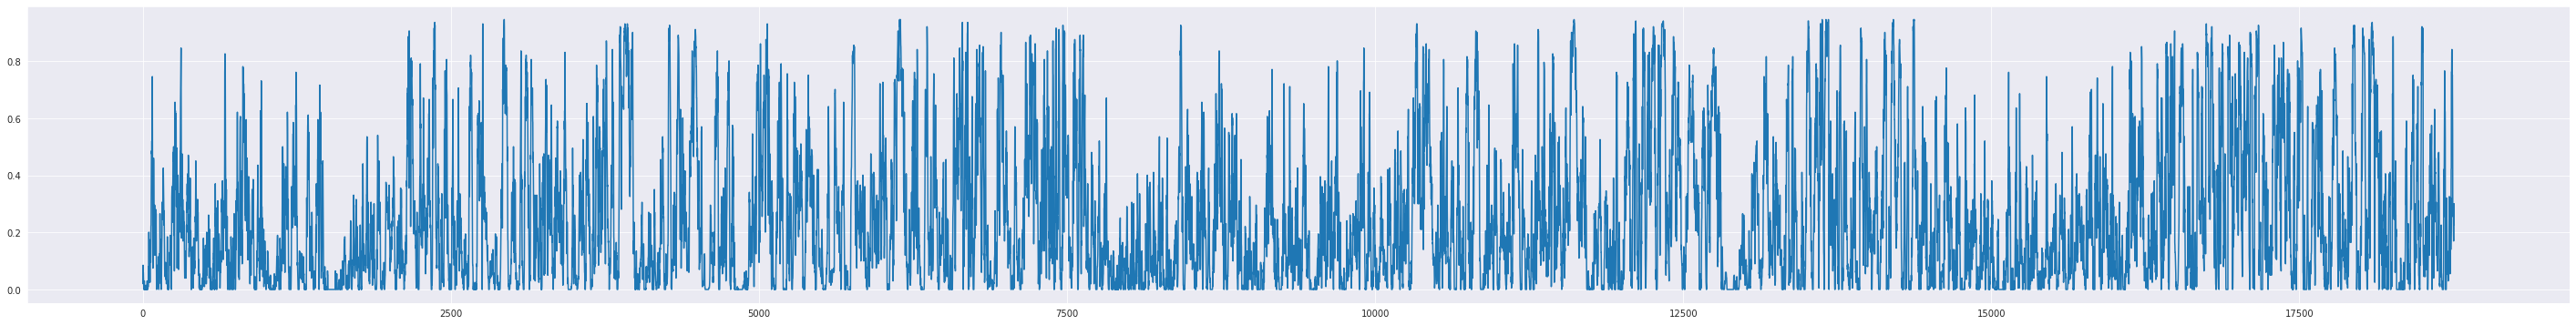

In [ ]:
df_google.iloc[:,1].plot(figsize=(50, 6),x=time_axis)

In [ ]:
time_axis

0       2009-07-01 00:00:00
1       2009-07-01 01:00:00
2       2009-07-01 02:00:00
3       2009-07-01 03:00:00
4       2009-07-01 04:00:00
                ...        
18752   2012-06-26 08:00:00
18753   2012-06-26 09:00:00
18754   2012-06-26 10:00:00
18755   2012-06-26 11:00:00
18756   2012-06-26 12:00:00
Name: date, Length: 18757, dtype: datetime64[ns]

In [ ]:
actual_data.shape

(18757, 2)

In [ ]:
arr_data=np.array(actual_data)

In [ ]:
for i in range(len(arr_data)):
  if arr_data[i,0]==2010123123: 
    mark=i
    print(mark)
    break

13175


In [ ]:
actual_data=arr_data[:mark+1,1]
actual_data.shape

(13176,)

In [ ]:
ip=[]
op=[]
input_size=72
output_size=48
shift=1
for i in range(0,len(actual_data)-(input_size+output_size+shift-1),shift):
  ip.append(actual_data[i:i+input_size])
  op.append(actual_data[i+input_size:i+input_size+output_size])

ip_data=np.array(ip)
op_data=np.array(op)

ip_data.shape,op_data.shape

((13056, 72), (13056, 48))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(ip_data,op_data,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(9139, 72) (9139, 48)
(3917, 72) (3917, 48)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(9139, 72, 1)

In [ ]:
x_test=x_test.reshape(x_test.shape[0],x_train.shape[1],1)
x_test.shape

(3917, 72, 1)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.GRU(96,input_shape=(72,1),activation='tanh'))
#model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(72,activation='relu'))
model.add(tf.keras.layers.Dense(48,activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 96)                28512     
                                                                 
 dense (Dense)               (None, 72)                6984      
                                                                 
 dense_1 (Dense)             (None, 48)                3504      
                                                                 
Total params: 39,000
Trainable params: 39,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2)

Epoch 1/100
183/183 - 13s - loss: 0.0743 - accuracy: 0.0368 - 13s/epoch - 70ms/step
Epoch 2/100
183/183 - 10s - loss: 0.0704 - accuracy: 0.0388 - 10s/epoch - 53ms/step
Epoch 3/100
183/183 - 10s - loss: 0.0702 - accuracy: 0.0395 - 10s/epoch - 52ms/step
Epoch 4/100
183/183 - 10s - loss: 0.0701 - accuracy: 0.0384 - 10s/epoch - 53ms/step
Epoch 5/100
183/183 - 10s - loss: 0.0696 - accuracy: 0.0384 - 10s/epoch - 52ms/step
Epoch 6/100
183/183 - 10s - loss: 0.0678 - accuracy: 0.0681 - 10s/epoch - 53ms/step
Epoch 7/100
183/183 - 10s - loss: 0.0677 - accuracy: 0.0678 - 10s/epoch - 54ms/step
Epoch 8/100
183/183 - 10s - loss: 0.0677 - accuracy: 0.0717 - 10s/epoch - 53ms/step
Epoch 9/100
183/183 - 10s - loss: 0.0676 - accuracy: 0.0720 - 10s/epoch - 56ms/step
Epoch 10/100
183/183 - 11s - loss: 0.0675 - accuracy: 0.0706 - 11s/epoch - 60ms/step
Epoch 11/100
183/183 - 10s - loss: 0.0657 - accuracy: 0.0684 - 10s/epoch - 54ms/step
Epoch 12/100
183/183 - 10s - loss: 0.0636 - accuracy: 0.0681 - 10s/epoch -

In [ ]:
prediction=model.predict(x_test)
prediction.shape

(3917, 48)

In [ ]:
temp=[]
for i in range(len(y_test)):
  temp.append(y_test[i,0])

actual_y_test=np.array(temp)
actual_y_test.shape

(3917,)

In [ ]:
temp=[]
for i in range(len(prediction)):
  temp.append(prediction[i,0])

predict_y_test=np.array(temp)
predict_y_test.shape

(3917,)

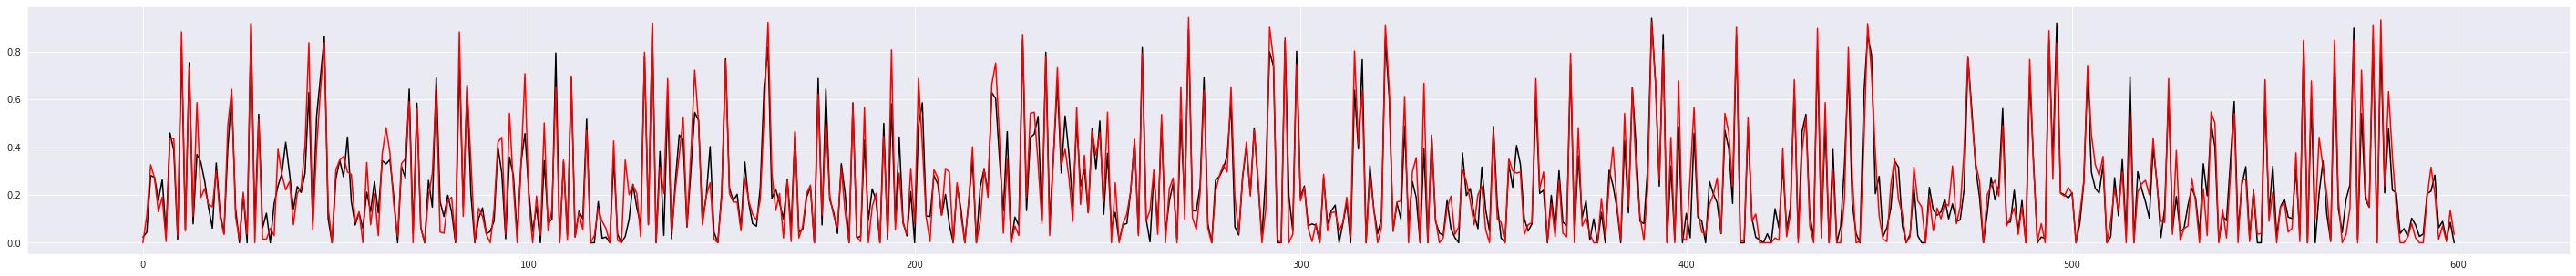

In [ ]:
plt.figure(figsize=(50,5))
plt.plot(predict_y_test[:600],c='black')
plt.plot(actual_y_test[:600],c='red')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,prediction)

0.787615400953157

In [ ]:
temp=[]
for i in range(len(x_train)):
  temp.append(x_train[i,0,0])

a=np.array(temp)
a.shape

temp=[]
for i in range(len(x_test)):
  temp.append(x_test[i,0,0])

b=np.array(temp)
b.shape

actual=np.concatenate((a,b),axis=0)
actual.shape

(13056,)

In [ ]:
temp=[]
for i in range(len(y_train)):
  temp.append(y_train[i,0])

a=np.array(temp)
a.shape

temp=[]
for i in range(len(prediction)):
  temp.append(prediction[i,0])

b=np.array(temp)
b.shape

prdt=np.concatenate((a,b),axis=0)
prdt.shape

(13056,)

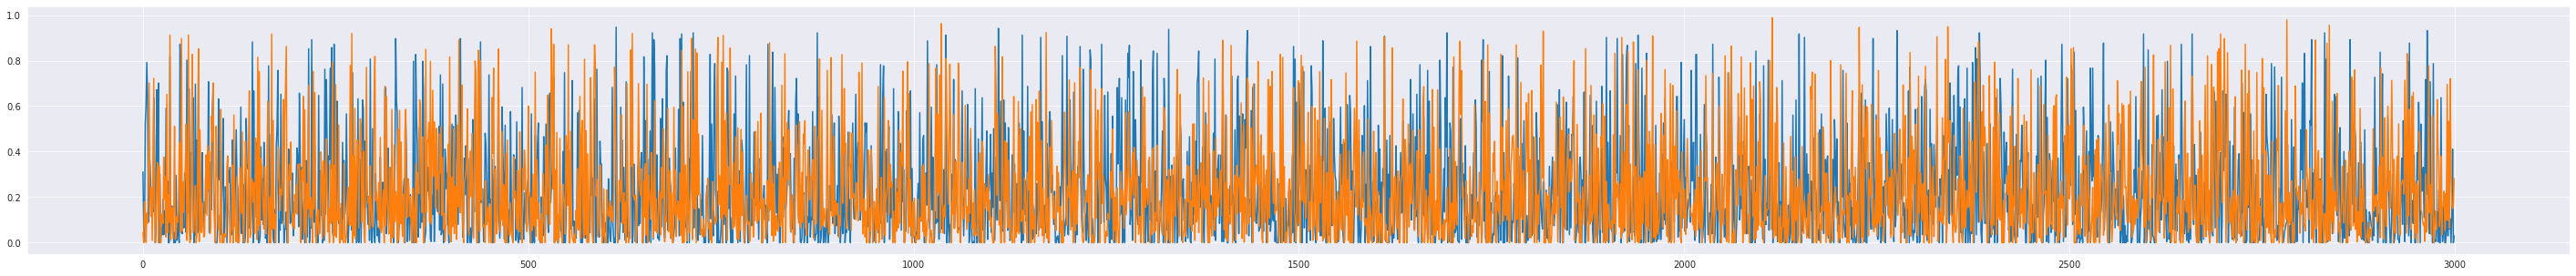

In [ ]:
plt.figure(figsize=(50,5))
plt.plot(actual[9000:12000])
plt.plot(prdt[9000:12000])

In [ ]:
actual[1:1000].shape,prdt[:999].shape

((999,), (999,))